In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns

/Users/traversal/Documents/Python virtual environment/SmartWater/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
pfl_step_df = pd.read_csv("../RawData/Profiler_modem_PFL_Step.dat", low_memory=False)
pfl_step_df.drop([0,1], axis=0, inplace=True)
pfl_step_df['TIMESTAMP'] = pd.to_datetime(pfl_step_df.TIMESTAMP)
pfl_step_df['_RS232Dpt'] = pfl_step_df['_RS232Dpt'].astype('float')
pfl_step_df['sensorParms(1)'] = pfl_step_df['sensorParms(1)'].astype('float')
pfl_step_df['sensorParms(2)'] = pfl_step_df['sensorParms(2)'].astype('float')
pfl_step_df['sensorParms(3)'] = pfl_step_df['sensorParms(3)'].astype('float')
pfl_step_df['sensorParms(4)'] = pfl_step_df['sensorParms(4)'].astype('float')
pfl_step_df['sensorParms(5)'] = pfl_step_df['sensorParms(5)'].astype('float')
pfl_step_df['sensorParms(6)'] = pfl_step_df['sensorParms(6)'].astype('float')
pfl_step_df['sensorParms(7)'] = pfl_step_df['sensorParms(7)'].astype('float')
pfl_step_df['sensorParms(8)'] = pfl_step_df['sensorParms(8)'].astype('float')
pfl_step_df['sensorParms(9)'] = pfl_step_df['sensorParms(9)'].astype('float')
pfl_step_df['sensorParms(10)'] = pfl_step_df['sensorParms(10)'].astype('float')
pfl_step_df['sensorParms(11)'] = pfl_step_df['sensorParms(11)'].astype('float')
pfl_step_df.head()

,TIMESTAMP,RECORD,PFL_Counter,_CntRS232,_RS232Dpt,sensorParms(1),sensorParms(2),sensorParms(3),sensorParms(4),sensorParms(5),sensorParms(6),sensorParms(7),sensorParms(8),sensorParms(9),sensorParms(10),sensorParms(11)
2,2020-06-09 15:14:06,0,1,1,0.912,11.428,34.73,46.88,0.02,6.48,142.91,1.05,1.05,0.912,7.31,19.23
3,2020-06-09 15:15:39,1,1,1,2.134,10.806,34.18,46.89,0.02,6.48,141.16,1.09,1.09,2.134,7.65,20.12
4,2020-06-09 15:17:11,2,1,1,3.140,10.649,34.04,46.90,0.02,6.47,141.02,1.08,1.08,3.140,7.69,20.24
5,2020-06-09 15:18:43,3,1,1,4.122,10.375,33.79,46.89,0.02,6.45,141.10,1.06,1.06,4.122,7.79,20.50
6,2020-06-09 15:20:15,4,1,1,5.107,10.043,33.51,46.91,0.02,6.44,140.44,1.06,1.06,5.107,7.90,20.78


In [13]:
copy_df = pfl_step_df.__deepcopy__()
copy_df2=copy_df.drop(['RECORD','PFL_Counter','_CntRS232'], axis=1)
pfl_step_report=pandas_profiling.ProfileReport(copy_df2)
pfl_step_report.to_file('PFL_raw_data_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]


# dataset description

In [4]:
sensor_list = ["sensorParms(1)","sensorParms(2)","sensorParms(3)","sensorParms(4)","sensorParms(5)","sensorParms(6)","sensorParms(7)"
,"sensorParms(8)","sensorParms(9)","sensorParms(10)","sensorParms(11)"]

In [5]:
for i in range(1,11):
    column_name = sensor_list[i]
    print("descriptiion for ", column_name, "is ", pfl_step_df[column_name].describe())

descriptiion for  sensorParms(2) is  count    38765.000000
mean        30.210909
std          2.384660
min         26.660000
25%         29.060000
50%         29.680000
75%         30.620000
max         60.210000
Name: sensorParms(2), dtype: float64
descriptiion for  sensorParms(3) is  count    38765.000000
mean        47.142626
std          1.759320
min          0.020000
25%         46.220000
50%         47.350000
75%         47.750000
max         96.360000
Name: sensorParms(3), dtype: float64
descriptiion for  sensorParms(4) is  count    38765.000000
mean         0.021815
std          0.164582
min         -4.350000
25%          0.020000
50%          0.020000
75%          0.020000
max         12.080000
Name: sensorParms(4), dtype: float64
descriptiion for  sensorParms(5) is  count    38765.000000
mean         2.601193
std          5.301233
min         -4.350000
25%          0.000000
50%          0.000000
75%          6.480000
max        141.870000
Name: sensorParms(5), dtype: float64


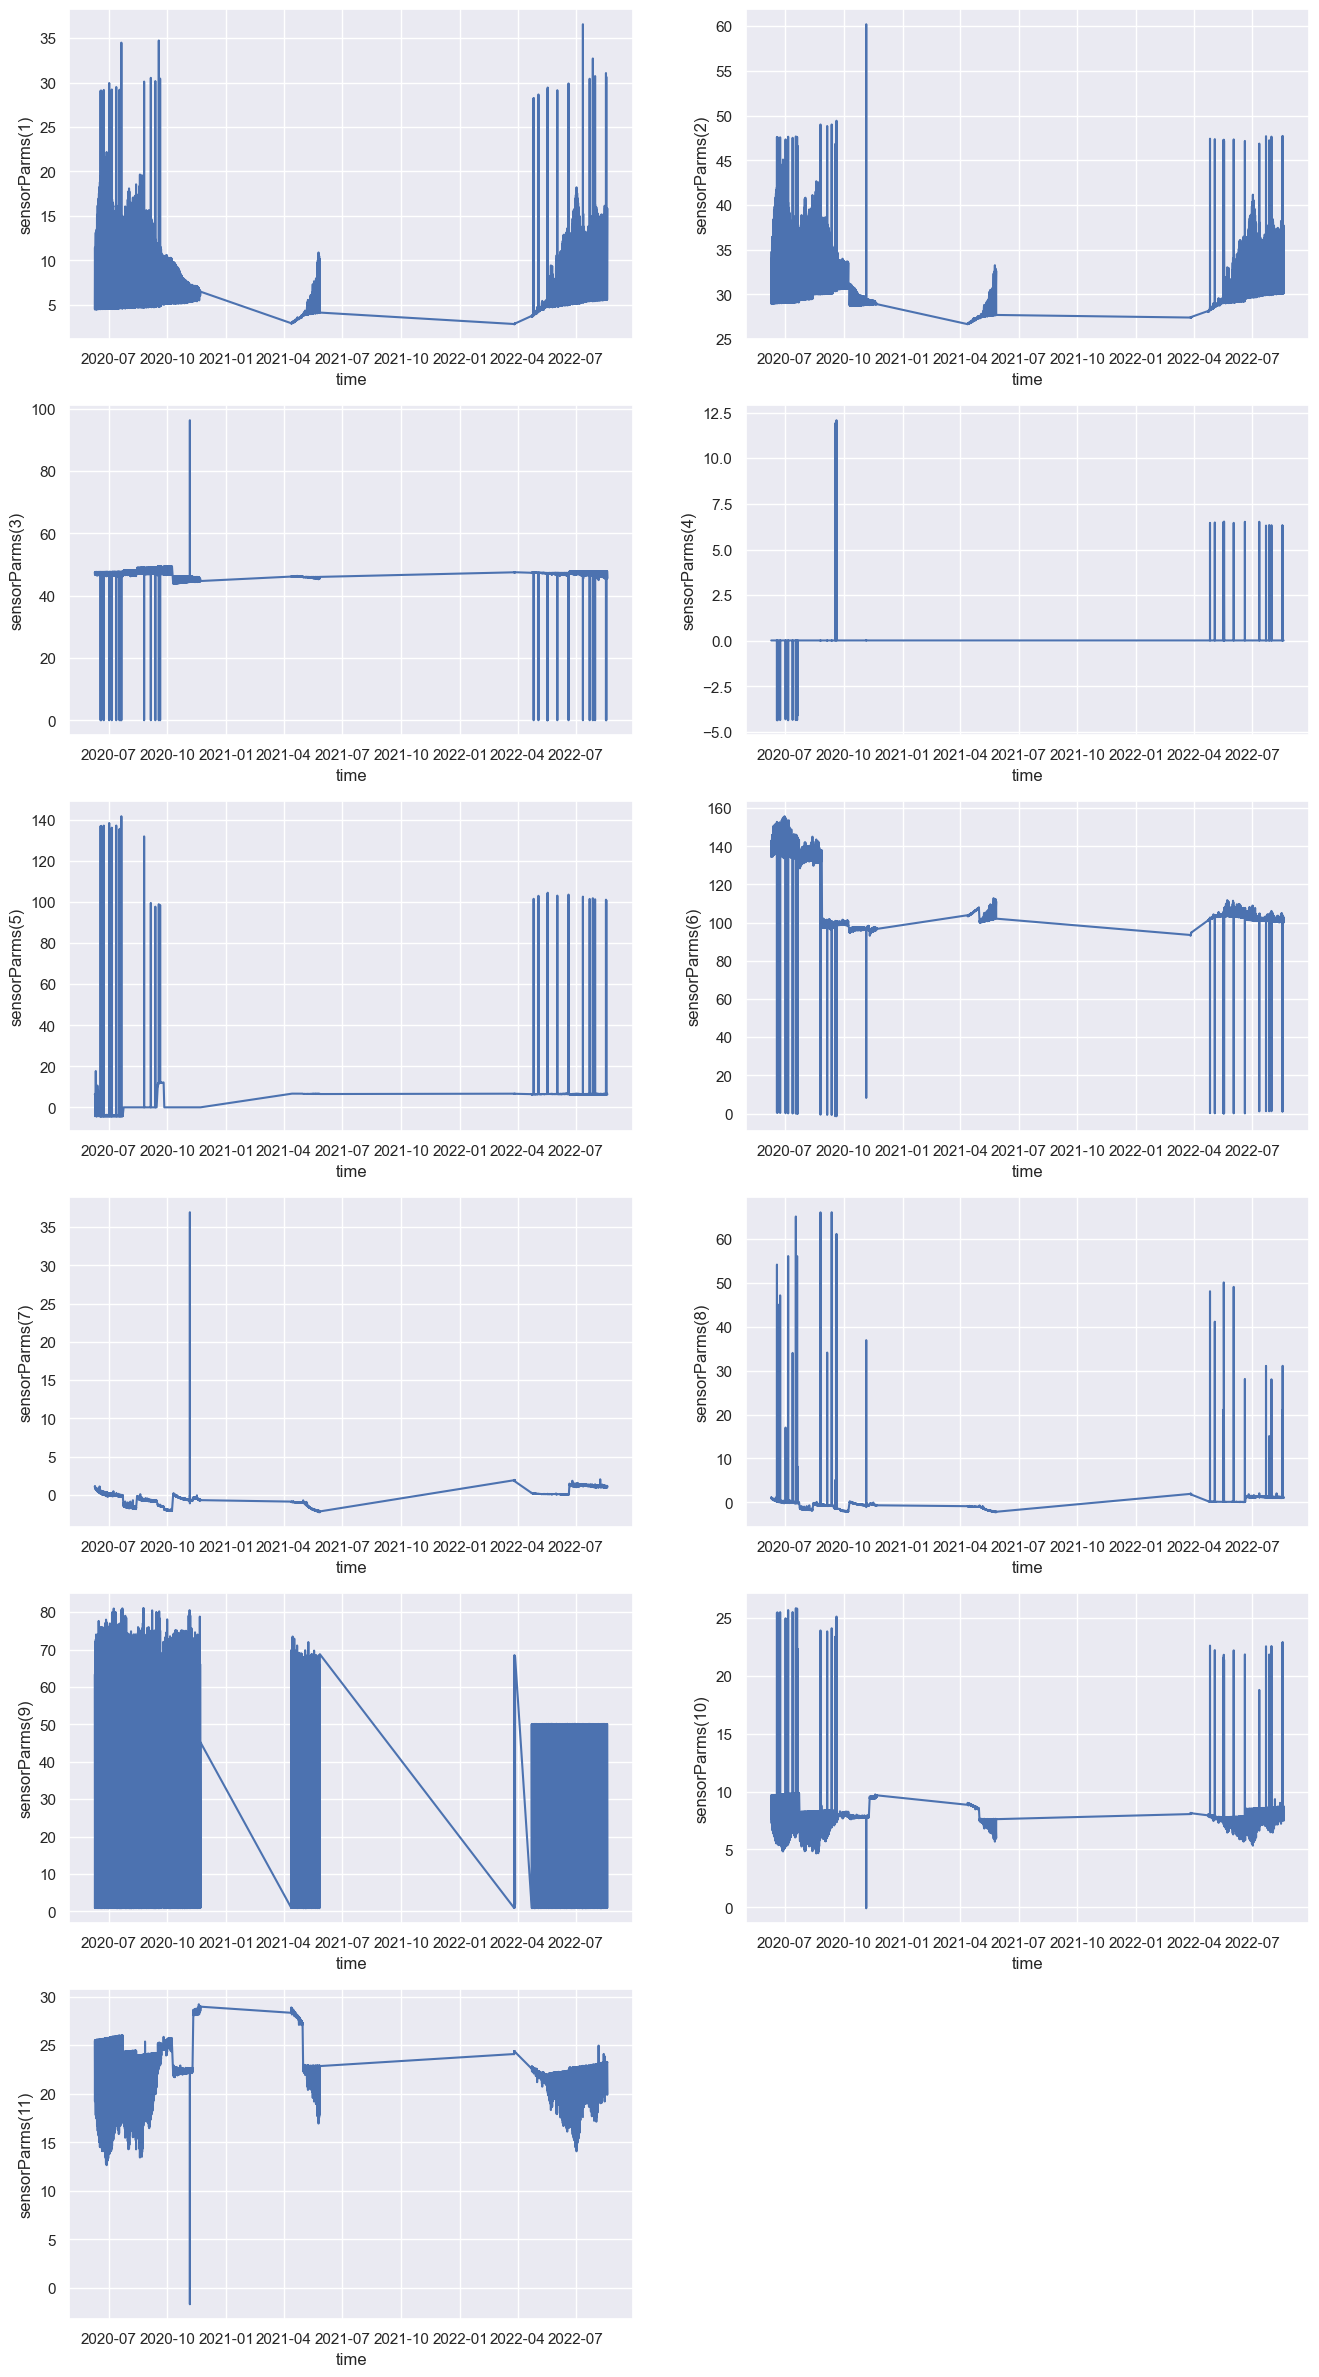

In [15]:
plt.figure(figsize=(16,30))

for i in range(1,12):
    column_name = sensor_list[i-1]
    plt.subplot(6,2,i)
    plt.plot(pfl_step_df["TIMESTAMP"], pfl_step_df[column_name])
    plt.xlabel("time")
    plt.ylabel(column_name)

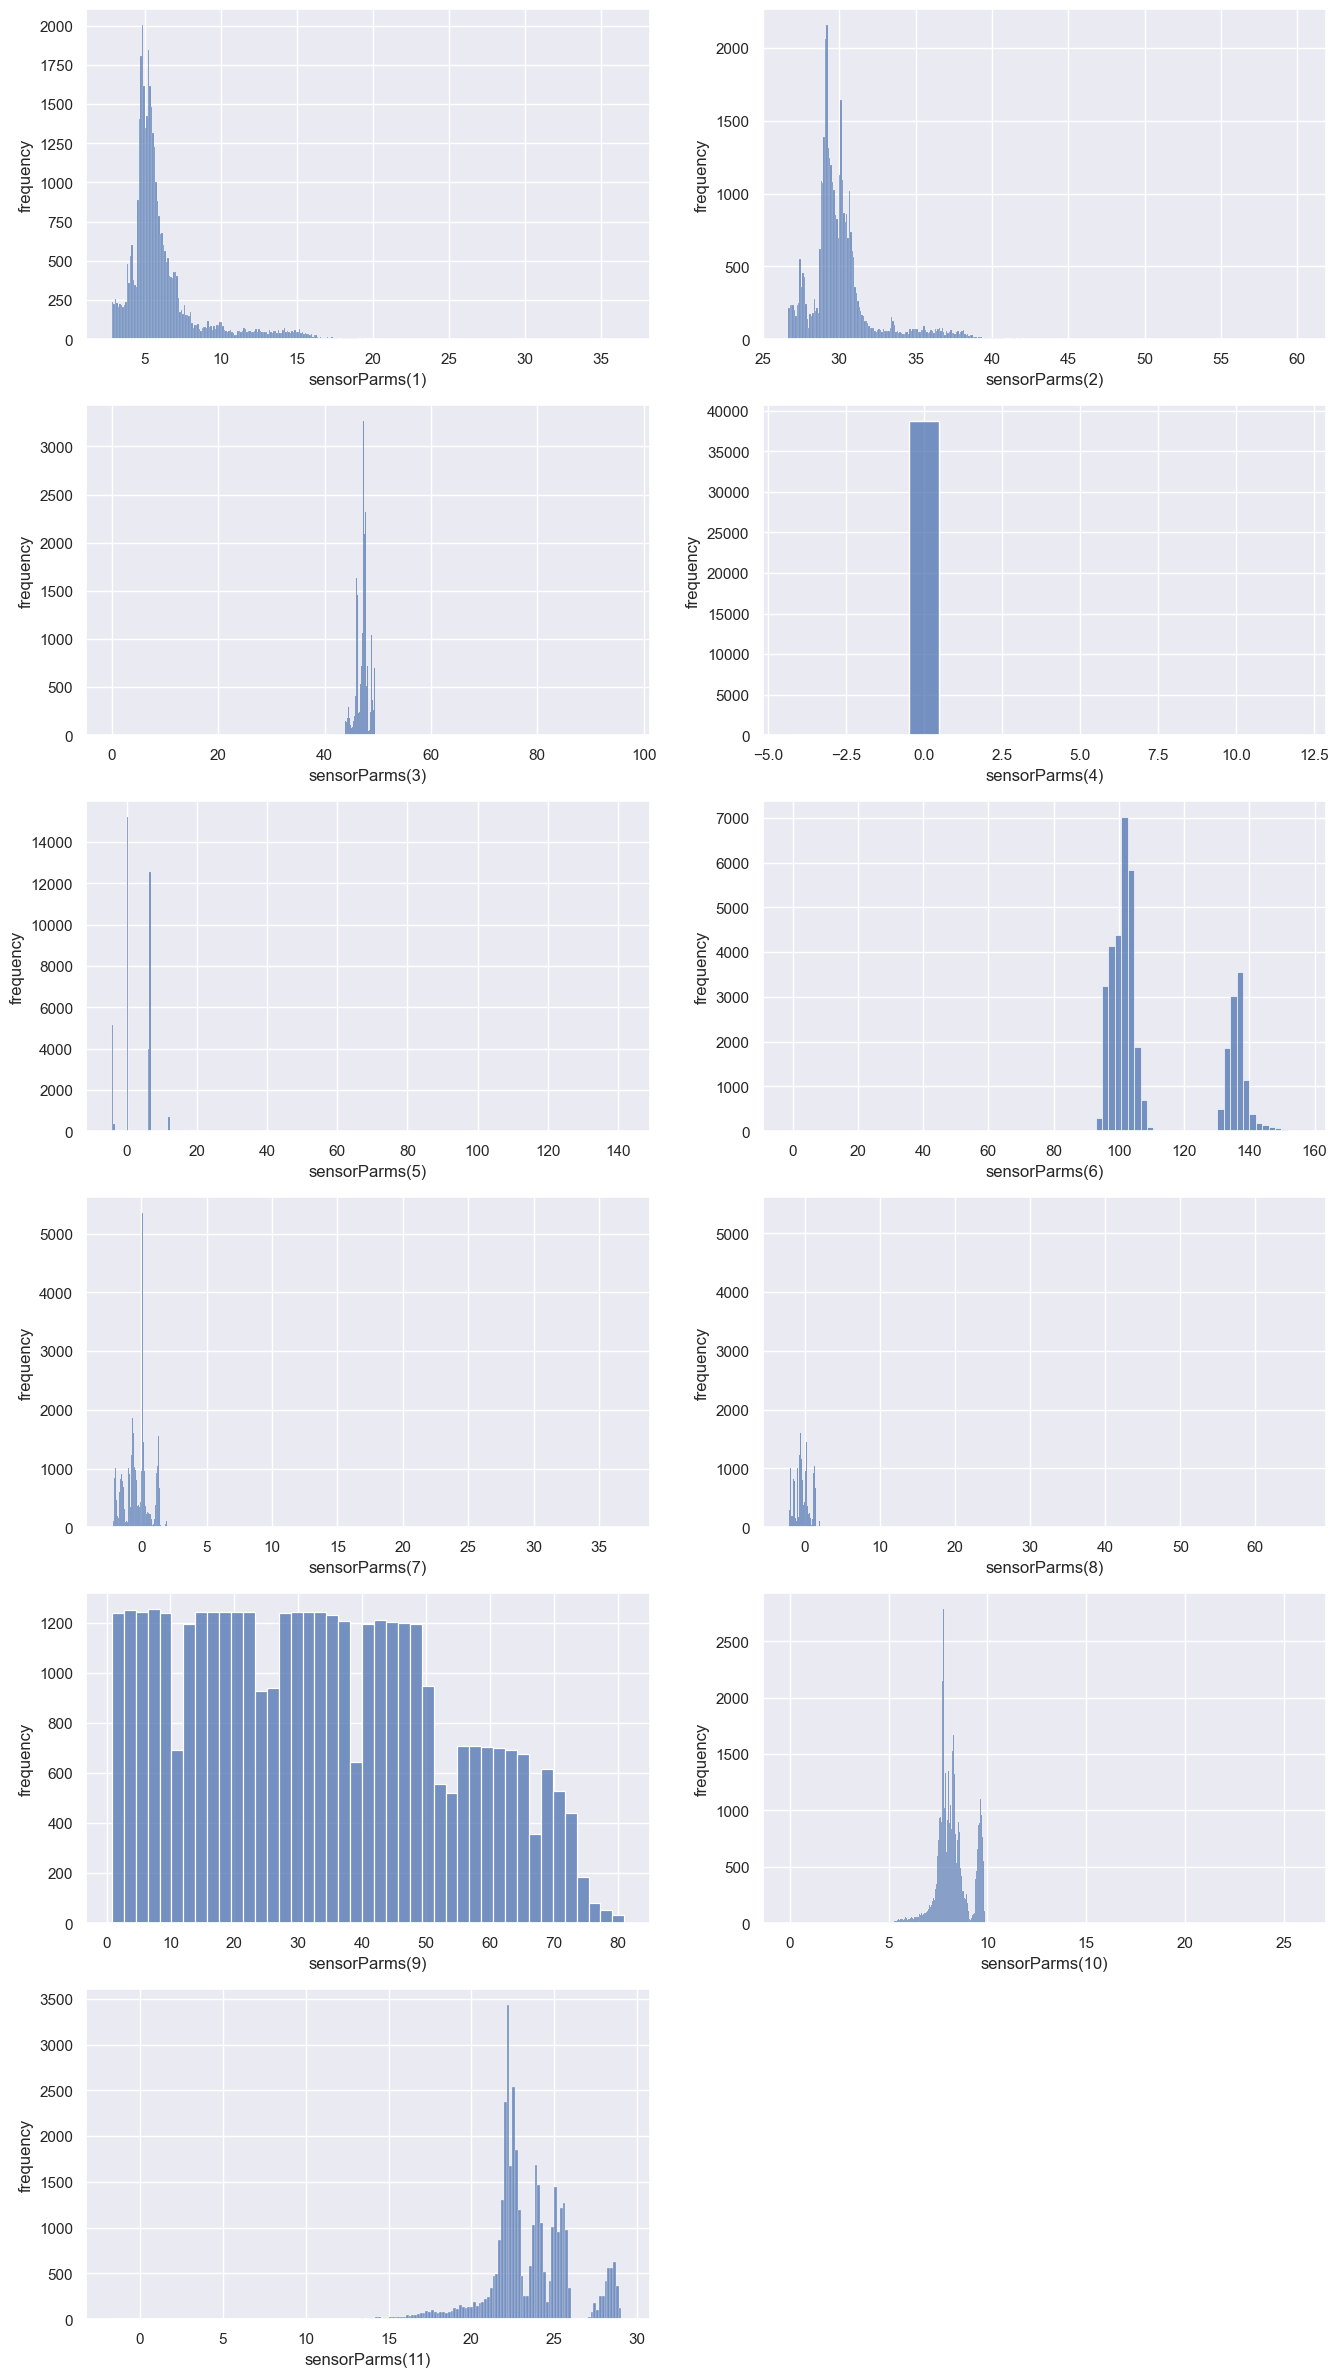

In [19]:
plt.figure(figsize=(16,30))
sns.set() 
for i in range(1,12):
    column_name = sensor_list[i-1]
    sns.histplot(pfl_step_df[column_name], ax=plt.subplot(6,2,i))
    plt.xlabel(column_name)
    plt.ylabel("frequency")

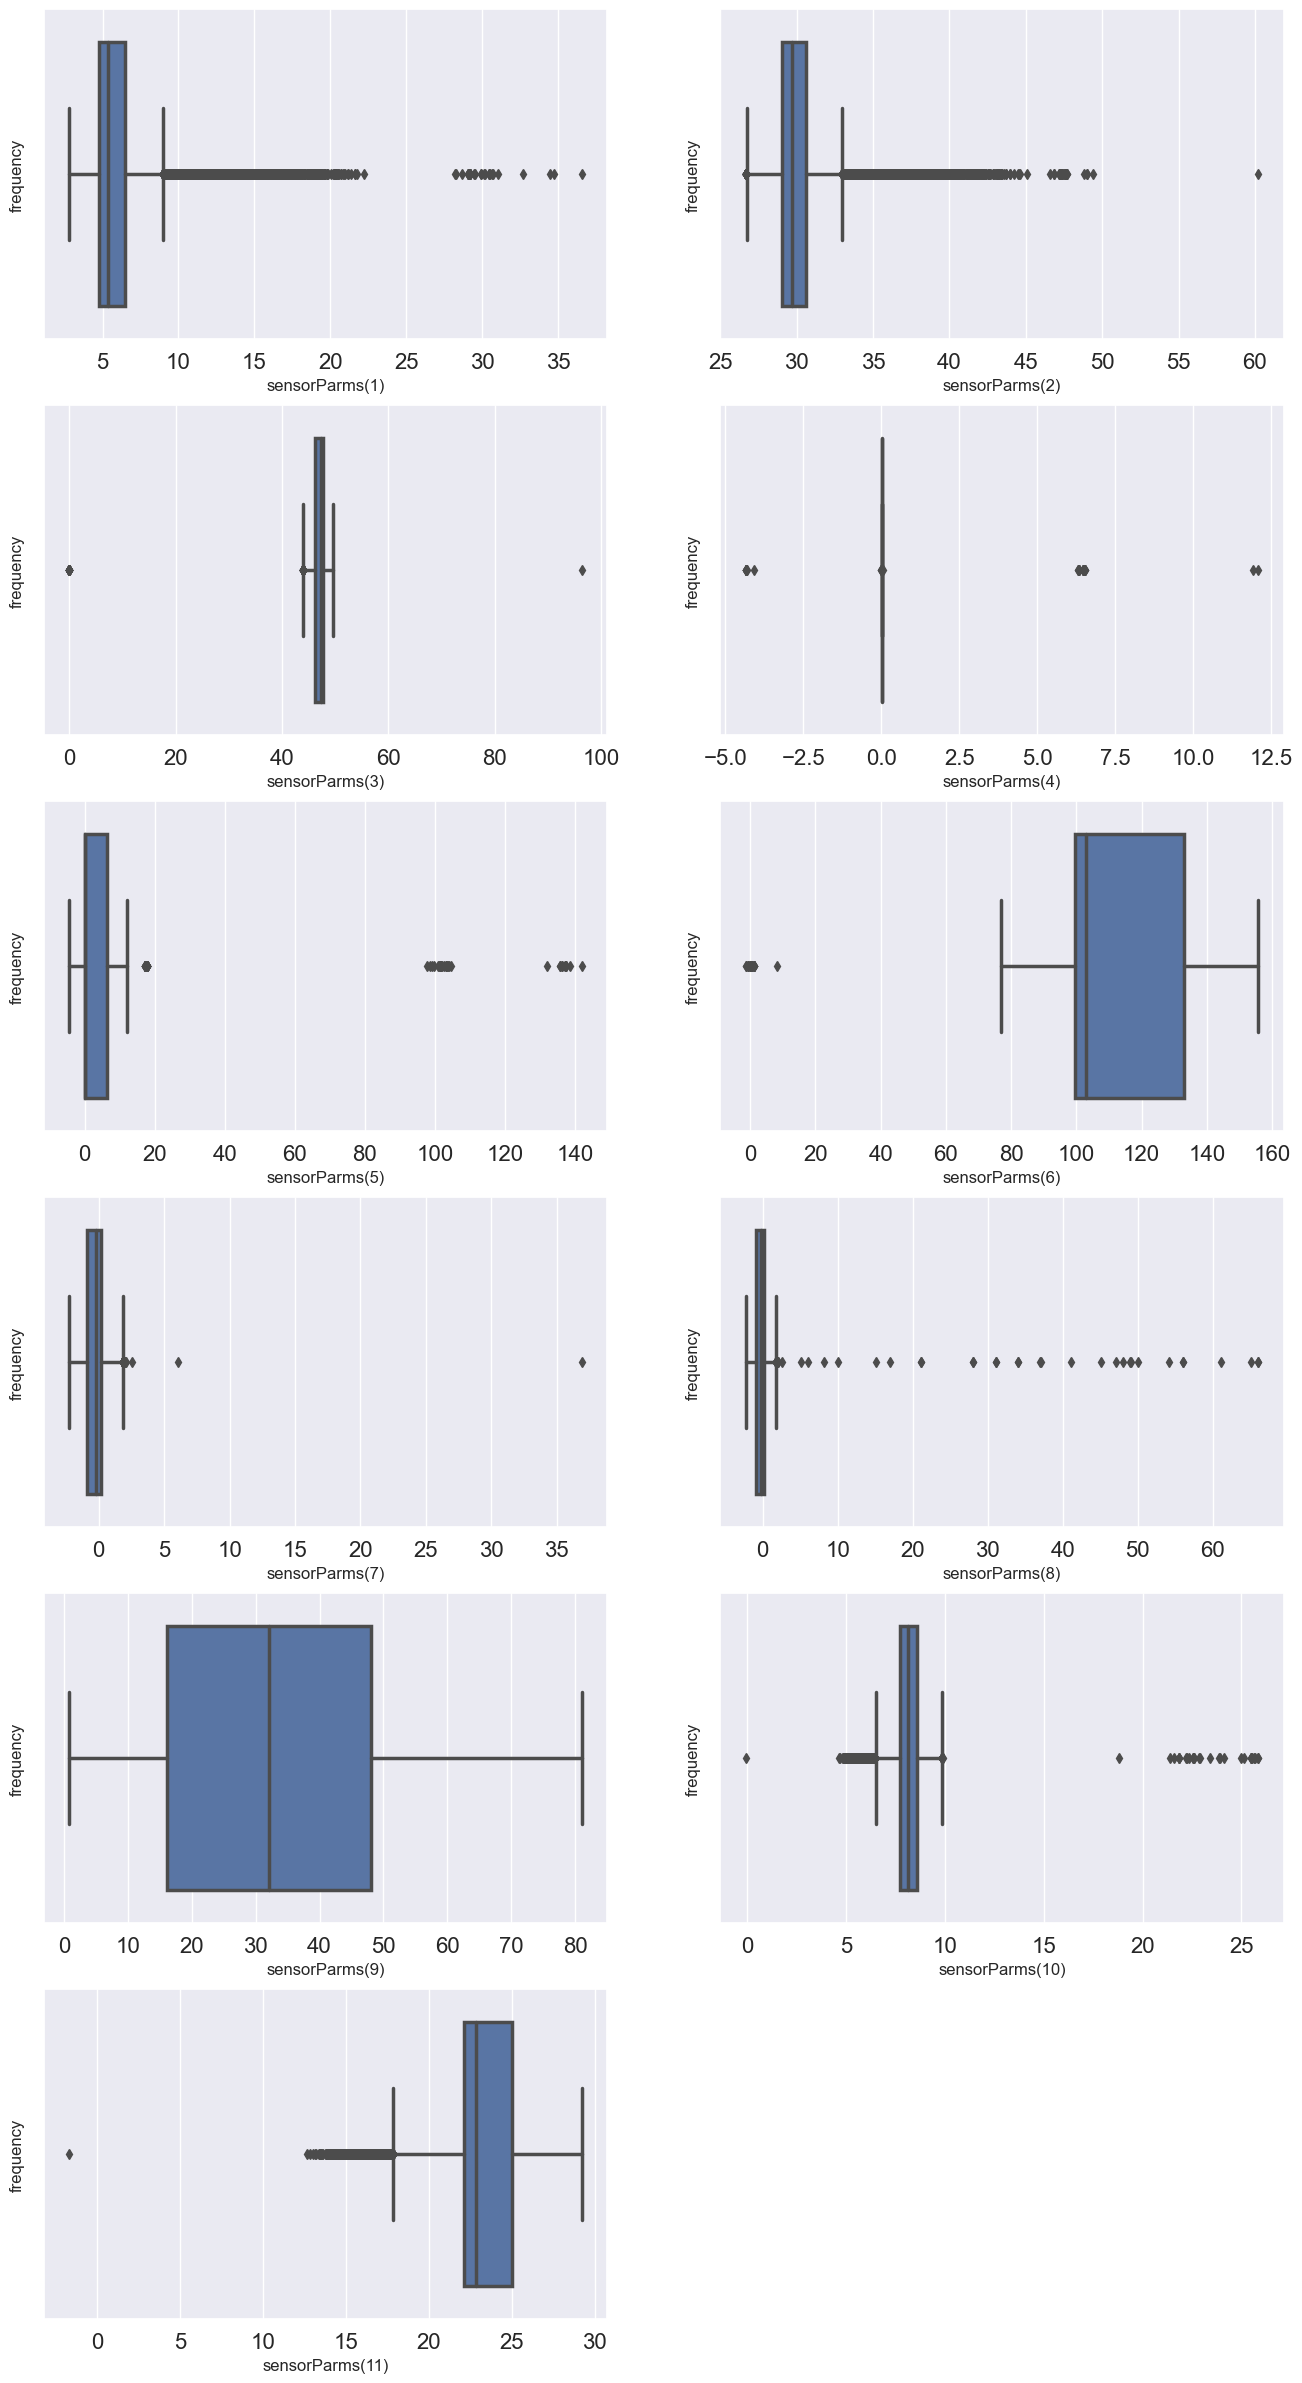

In [21]:
plt.figure(figsize=(16,30))
sns.set() 
for i in range(1,12):
    column_name = sensor_list[i-1]
    ax = sns.boxplot(x=column_name,
                  data=pfl_step_df, linewidth=2.5, ax=plt.subplot(6,2,i))

    plt.xticks(fontsize=16)  #旋转x轴刻度
    plt.yticks(fontsize=16) 
    plt.xlabel(column_name)
    plt.ylabel("frequency")

In [ ]:
ax = sns.boxplot(x="sensorParms(1)",
                  data=pfl_step_df, linewidth=2.5)

plt.xticks(fontsize=16)  #旋转x轴刻度
plt.yticks(fontsize=16) 
plt.xlabel('record', fontsize=16)
plt.ylabel('sensorParms(1)',fontsize=16)
plt.legend(fontsize=16, loc='upper center')
plt.show()